Question: A client wants to open a restaurant in Washigton DC. What type of restaurant should they open and where in DC ? 


Method: 
This project will use Yelp Database, Uber eats APi and Census APi. It will also focus on ethnicity, ratings and localisation. 











In [1]:
#Dependencies
import requests 
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from config import api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
from collections import defaultdict


In [2]:
#Northwest Analysis Data (NW)

#Name of the lists we are going to use to store the data from the Json File
name= []
rating = []
type1 =[]
lat = []
long = []
address = []
zipcode = []
state = []

# Url from the Json File + Usage of our api key
headers = {'Authorization': 'Bearer %s' % api_key}
url='https://api.yelp.com/v3/businesses/search'

#Loop to get the entire 1000 displayed in one page.
for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.944993",
                "longitude": "-77.078362",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)

    #json.dumps(data)
    
    
    #Store data needed into the lists

    for i in range(50):
     
        try:
            type1.append(data["businesses"][i]["categories"][0]["title"])
            name.append(data["businesses"][i]["name"])
            rating.append(data["businesses"][i]["rating"])
            lat.append(data["businesses"][i]["coordinates"]["latitude"])
            long.append(data["businesses"][i]["coordinates"]["longitude"])
            address.append(data["businesses"][i]["location"]["address1"])
            zipcode.append(data["businesses"][i]["location"]["zip_code"])
            state.append(data["businesses"][i]["location"]["state"])
        except:
            print(f'There is nothing on page {offset} in row {i}')
            
    

There is nothing on page 700 in row 0
There is nothing on page 700 in row 1
There is nothing on page 700 in row 2
There is nothing on page 700 in row 3
There is nothing on page 700 in row 4
There is nothing on page 700 in row 5
There is nothing on page 700 in row 6
There is nothing on page 700 in row 7
There is nothing on page 700 in row 8
There is nothing on page 700 in row 9
There is nothing on page 700 in row 10
There is nothing on page 700 in row 11
There is nothing on page 700 in row 12
There is nothing on page 700 in row 13
There is nothing on page 700 in row 14
There is nothing on page 700 in row 15
There is nothing on page 700 in row 16
There is nothing on page 700 in row 17
There is nothing on page 700 in row 18
There is nothing on page 700 in row 19
There is nothing on page 700 in row 20
There is nothing on page 700 in row 21
There is nothing on page 700 in row 22
There is nothing on page 700 in row 23
There is nothing on page 700 in row 24
There is nothing on page 700 in row

In [3]:
#NW DATAFRAME 

dictionary = {'name': name,
              "category": type1, 
              "latitude": lat, 
              "longitude":long, 
              'rating': rating,
              "address": address, 
              "State": state, 
              "Zipcode": zipcode
             
             }



NW = pd.DataFrame(dictionary)

#Store blanks adresss in New DF (foodtrucks have no addresses)
Foodtruck = NW.loc[NW['address'] == ''] 
Foodtrucka = NW.loc[NW['category'] == 'Food Truck']
Foodtruckb = NW.loc[NW['category'] == 'Food Trucks']
                    

#Replace None by NAN
NW = NW.fillna(value=np.nan)

#Get rid of NAN 
NW = NW.dropna(how = 'any')

#Get rid of blanks 
NW = NW.loc[NW['address'] != '']

#Create a new list for the initals 

test = []
#Loop to know from which region in DC restaurant belong
for initial in NW['address']:
    test.append(initial[-2:].upper())
    
#Store initials of the location of restaurants + store food trucks in different lists 
NW['initial'] = test 
NW = NW.loc[NW['category'] != 'Food Truck']
NW = NW.loc[NW['category'] != 'Food Trucks']
NW = NW.loc[NW['State'] == 'DC']
TBH = NW.loc[NW['initial'] != 'NW']

#Only keep the restaurant located in NW DC
NW = NW.loc[NW['initial'] == 'NW']

#Clean categories name
NWClean = NW.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})

#Groupby rating and category to create a plot category vs rating for both the cleaned version and raw version of the data 
AnalysisNW= NW[["category", "rating"]].groupby("category").mean()
AnalysisNW2= NWClean[["category", "rating"]].groupby("category").mean()

#Groupby name and category to have the total of each type of restaurant 
NW_typerest = NWClean.groupby('category')['name'].count()



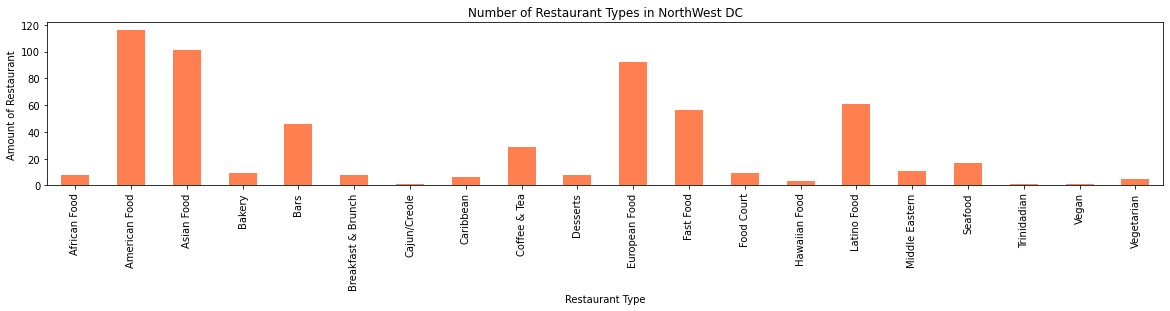

In [4]:
#Plot of #Restaurant type in NW
NW_num = NW_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in NorthWest DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

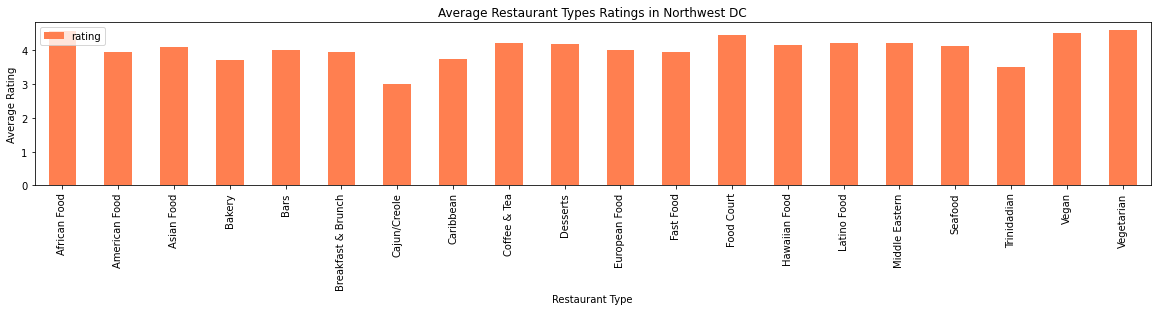

In [5]:
#Graph of NW restaurants regrouped
NW_grouped = AnalysisNW2.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Northwest DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.show()



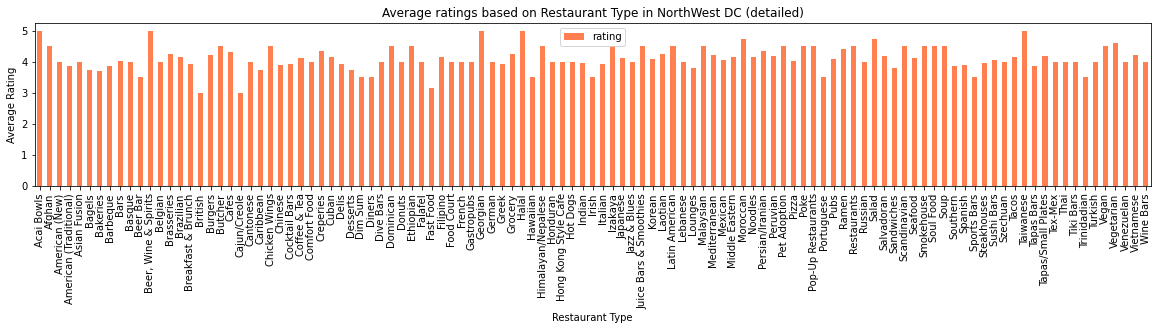

In [6]:
#Restaurant ratings of NW dc restaurant based on unsorted categories 
NW_D = AnalysisNW.plot(kind="bar", color='coral', title = "Average ratings based on Restaurant Type in NorthWest DC (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")

plt.show()


In [8]:
#NE offset and list

#NE AREA = 14.552 miles squared
name2= []
rating2 = []
type2 = []
lat2 = []
long2 = []
address2 = []
zipcode2 = []
state2 = []


for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.925193",
                "longitude": "-76.985428",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)


    for i in range(50):
     
        try:
            type2.append(data["businesses"][i]["categories"][0]["title"])
            name2.append(data["businesses"][i]["name"])
            rating2.append(data["businesses"][i]["rating"])
            lat2.append(data["businesses"][i]["coordinates"]["latitude"])
            long2.append(data["businesses"][i]["coordinates"]["longitude"])
            address2.append(data["businesses"][i]["location"]["address1"])
            zipcode2.append(data["businesses"][i]["location"]["zip_code"])
            state2.append(data["businesses"][i]["location"]["state"])
             
        except:
            print(f'There is nothing on page {offset} in row {i}')
           



There is nothing on page 300 in row 28


In [9]:
#NE DATAFRAME 

dictionary = {'name': name2,
              "category": type2, 
              "latitude": lat2, 
              "longitude":long2, 
              'rating': rating2,
             "State": state2, 
              "Zipcode": zipcode2,
              "address": address2, 
              #'initials': initials, 
             }



NE= pd.DataFrame(dictionary)

#Store blanks adresss in New DF (foodtrucks have no addresses)
Foodtruck2 = NE.loc[NE['address'] == ''] 
Foodtruck2a = NE.loc[NE['category'] == 'Food Truck']
Foodtruck2b = NE.loc[NE['category'] == 'Food Trucks']
                    

#Replace None by NAN
NE = NE.fillna(value=np.nan)

#Get rid of NAN 
NE = NE.dropna(how = 'any')

#Get rid of blanks 
NE = NE.loc[NE['address'] != '']

test2 = []
for initial in NE['address']:
    test2.append(initial[-2:].upper())
    

NE['initial'] = test2 

NE = NE.loc[NE['State'] == 'DC']
NE = NE.loc[NE['category'] != 'Food Truck']
NE = NE.loc[NE['category'] != 'Food Trucks']
TBH2 = NE.loc[NE['initial'] != 'NE']
NE = NE.loc[NE['initial'] == 'NE']
NE['category'].value_counts()

NEClean = NE.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})

AnalysisNE= NE[["category", "rating"]].groupby("category").mean()
AnalysisNE2= NEClean[["category", "rating"]].groupby("category").mean()
NE_typerest = NEClean.groupby('category')['name'].count()


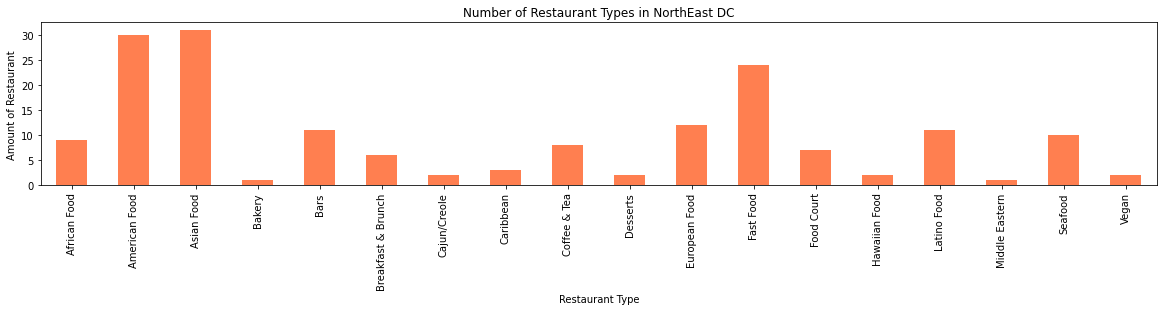

In [10]:
#Plot of #Restaurant type in NE
NE_num = NE_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in NorthEast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

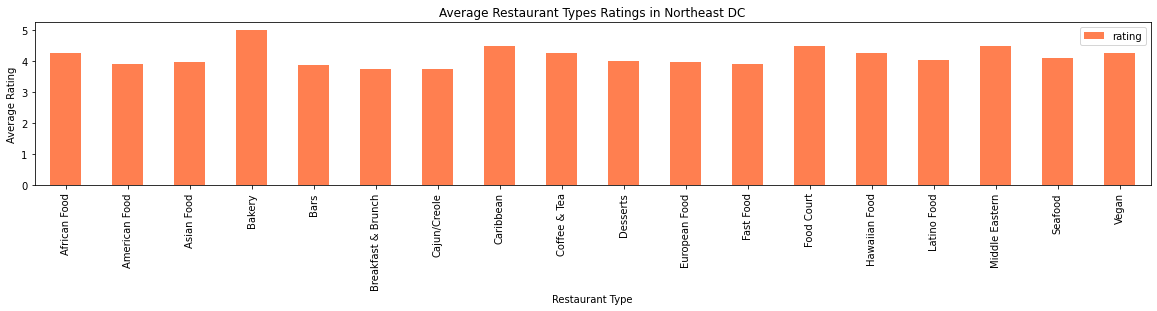

In [11]:
NE_grouped = AnalysisNE2.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Northeast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")

plt.show()


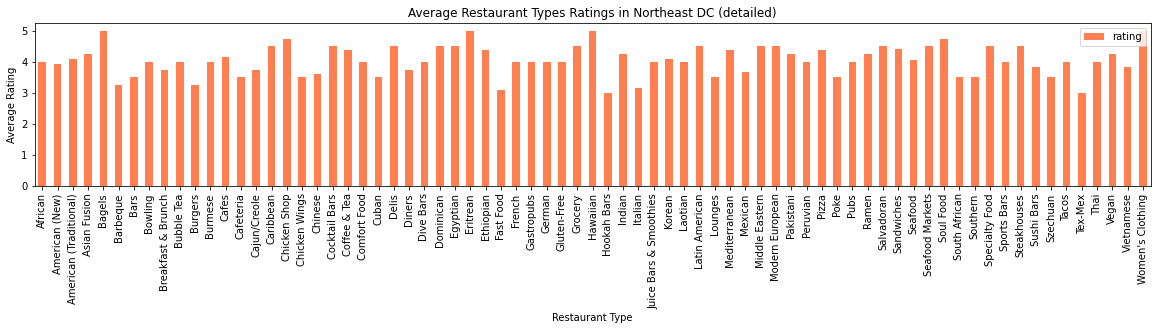

In [12]:
NE_D = AnalysisNE.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Northeast DC (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")

plt.show()


In [13]:
name3= []
rating3 = []
type3 = []
lat3 = []
long3 = []
address3  = []
zipcode3 = []
state3 = []


for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.900244",
                "longitude": "-77.037211",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)


    for i in range(50):
     
        try:
            type3.append(data["businesses"][i]["categories"][0]["title"])
            name3.append(data["businesses"][i]["name"])
            rating3.append(data["businesses"][i]["rating"])
            lat3.append(data["businesses"][i]["coordinates"]["latitude"])
            long3.append(data["businesses"][i]["coordinates"]["longitude"])
            address3.append(data["businesses"][i]["location"]["address1"])
            zipcode3.append(data["businesses"][i]["location"]["zip_code"])
            state3.append(data["businesses"][i]["location"]["state"])
        except:
            print(f'There is nothing on page {offset} in row {i}')
           

There is nothing on page 850 in row 0
There is nothing on page 850 in row 1
There is nothing on page 850 in row 2
There is nothing on page 850 in row 3
There is nothing on page 850 in row 4
There is nothing on page 850 in row 5
There is nothing on page 850 in row 6
There is nothing on page 850 in row 7
There is nothing on page 850 in row 8
There is nothing on page 850 in row 9
There is nothing on page 850 in row 10
There is nothing on page 850 in row 11
There is nothing on page 850 in row 12
There is nothing on page 850 in row 13
There is nothing on page 850 in row 14
There is nothing on page 850 in row 15
There is nothing on page 850 in row 16
There is nothing on page 850 in row 17
There is nothing on page 850 in row 18
There is nothing on page 850 in row 19
There is nothing on page 850 in row 20
There is nothing on page 850 in row 21
There is nothing on page 850 in row 22
There is nothing on page 850 in row 23
There is nothing on page 850 in row 24
There is nothing on page 850 in row

In [14]:
#SE DATAFRAME 

dictionary = {'name': name3,
              "category": type3, 
              "latitude": lat3, 
              "longitude":long3, 
              'rating': rating3,
              "State": state3, 
              "Zipcode": zipcode3,
              "address": address3, 
              #'initials': initials, 
             }



SE = pd.DataFrame(dictionary)

#Store blanks adresss in New DF (foodtrucks have no addresses)
Foodtruck3 = SE.loc[SE['address'] == '']
Foodtruck3a = SE.loc[SE['category'] == 'Food Truck']
Foodtruck3b = SE.loc[SE['category'] == 'Food Trucks']

#Get rid of blanks 
SE = SE.loc[SE['address'] != '']

#Replace None by NAN
SE = SE.fillna(value=np.nan)

#Get rid of NAN 
SE = SE.dropna(how = 'any')


                    

test3 = []
for initial in SE['address']:
    test3.append(initial[-2:].upper())
    

SE['initial'] = test3 

SE = SE.loc[SE['State'] == 'DC']
SE = SE.loc[SE['category'] != 'Food Truck']
SE = SE.loc[SE['category'] != 'Food Trucks']
TBH3 = SE.loc[SE['initial'] != 'SE']
SE = SE.loc[SE['initial'] == 'SE']


SEClean = SE.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})




AnalysisSE= SE[["category", "rating"]].groupby("category").mean()
AnalysisSE2= SEClean[["category", "rating"]].groupby("category").mean()

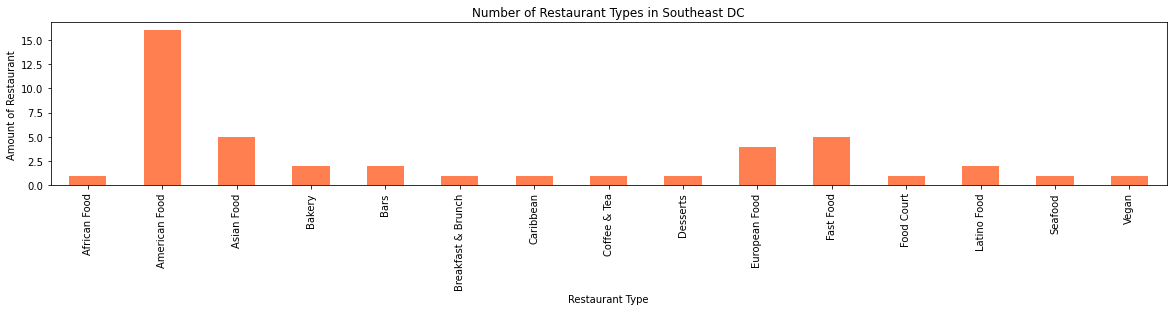

In [15]:
#Plot of #Restaurant type in SE
SE_typerest = SEClean.groupby('category')['name'].count()
SE_num = SE_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in Southeast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

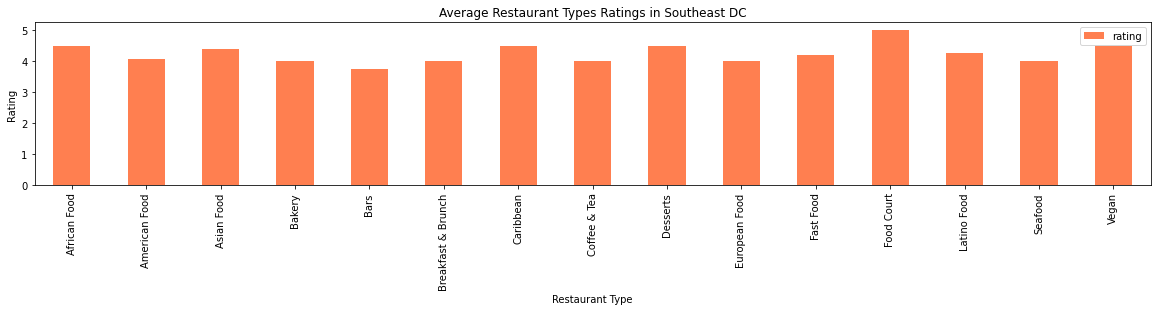

In [16]:
#Graph of SE restaurants regrouped
SE_grouped = AnalysisSE2.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Southeast DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()




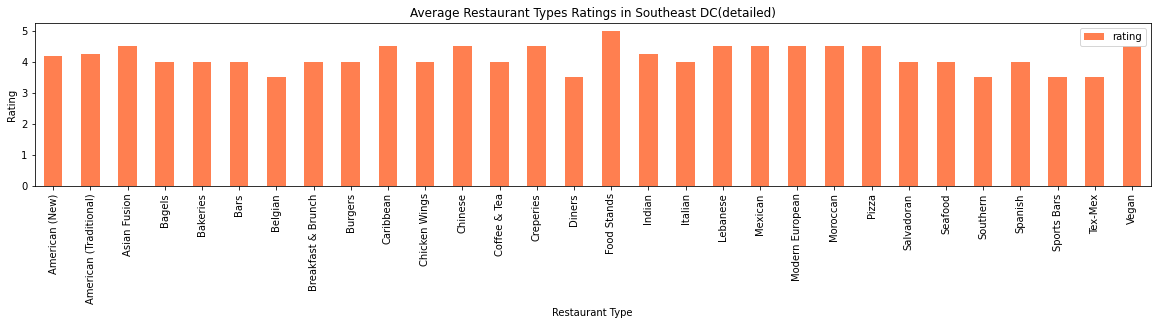

In [17]:
#SE restaurants detailed
SE_Detailed = AnalysisSE.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Southeast DC(detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()


In [18]:
name4= []
rating4 = []
type4 = []
lat4 = []
long4 = []
address4 = []
zipcode4 = []
state4 = []



for offset in range(0, 1000, 50):
    params = {
                'limit': 50, 
                "latitude":"38.889729",
                "longitude": "-76.989957",
                'term': "restaurant",
                'offset': offset, 
                
     
        }
    req = requests.get(url, params=params, headers=headers)
    data = json.loads(req.text)


    for i in range(50):
     
        try:
            type4.append(data["businesses"][i]["categories"][0]["title"])
            name4.append(data["businesses"][i]["name"])
            rating4.append(data["businesses"][i]["rating"])
            lat4.append(data["businesses"][i]["coordinates"]["latitude"])
            long4.append(data["businesses"][i]["coordinates"]["longitude"])
            address4.append(data["businesses"][i]["location"]["address1"])
            zipcode4.append(data["businesses"][i]["location"]["zip_code"])
            state4.append(data["businesses"][i]["location"]["state"])
        except:
            print(f'There is nothing on page {offset} in row {i}')
           

There is nothing on page 900 in row 10


In [19]:
#SW DATAFRAME 

dictionary = {'name': name4,
              "category": type4, 
              "latitude": lat4, 
              "longitude":long4, 
              'rating': rating4,
              "State": state4, 
              "Zipcode": zipcode4,
              "address": address4, 
              #'initials': initials, 
             }



SW = pd.DataFrame(dictionary)

#Store Foodtrucks in different DF (most of them don't have adresses)
Foodtruck4 = SW.loc[SW['address'] == ''] 
Foodtruck4a = SW.loc[SW['category'] == 'Food Truck']
Foodtruck4b = SW.loc[SW['category'] == 'Food Trucks']
                    
                    
#Replace None value by NAN
SW = SW.fillna(value=np.nan)

#Get rid of NAN 
SW = SW.dropna(how = 'any')

#Get rid of blanks 
SW = SW.loc[SW['address'] != '']

test4 = []
for initial in SW['address']:
    test4.append(initial[-2:].upper())
    

SW['initial'] = test4 

SW = SW.loc[SW['State'] == 'DC']
SW = SW.loc[SW['category'] != 'Food Truck']
SW = SW.loc[SW['category'] != 'Food Trucks']
TBH4 = SW.loc[SW['initial'] != 'SW']
SW = SW.loc[SW['initial'] == 'SW']

SW['category'].value_counts()
SWClean = SW.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Food Trucks":"American Food", "Gluten-Free":"Food Court","Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})


AnalysisSW= SW[["category", "rating"]].groupby("category").mean()
AnalysisSW2= SWClean[["category", "rating"]].groupby("category").mean()





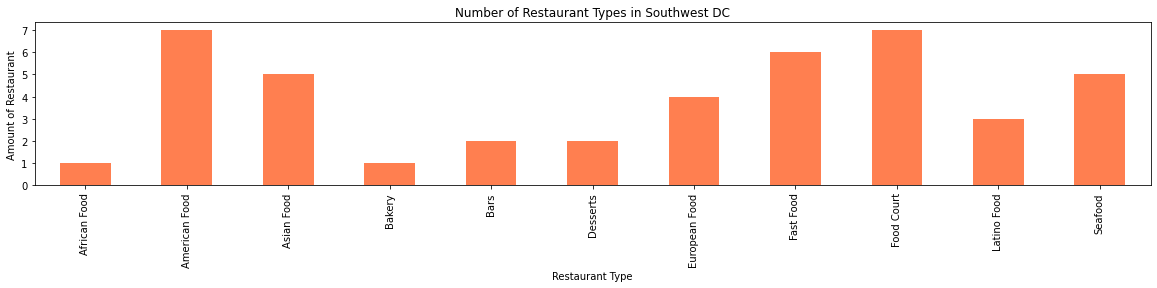

In [20]:
#Plot of #Restaurant type in SouthWest
SW_typerest = SWClean.groupby('category')['name'].count()
SW_num = SW_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in Southwest DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()

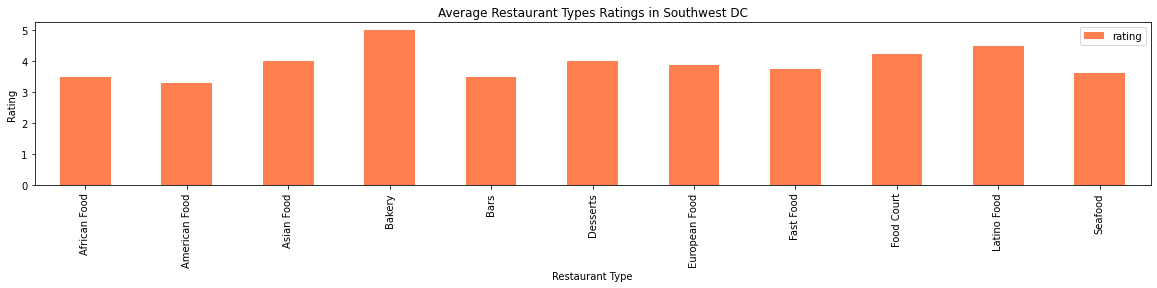

In [21]:
#Graph of SW restaurants regrouped
SW_grouped = AnalysisSW2.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Southwest DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()

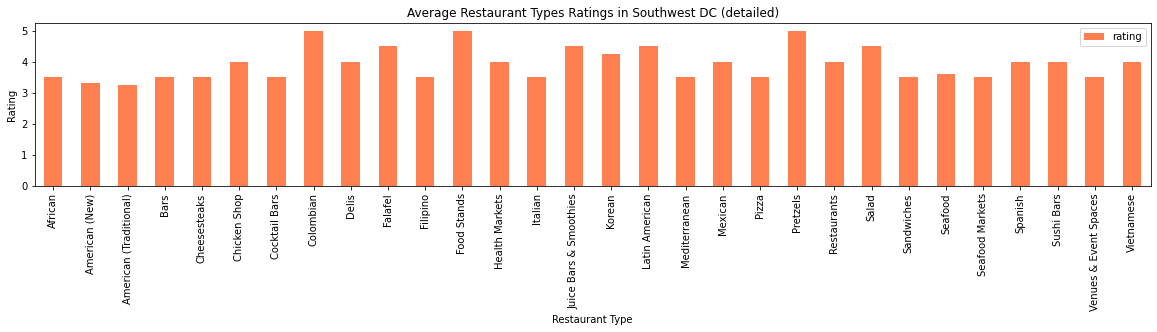

In [22]:
#SE restaurants detailed
SW_Detailed = AnalysisSW.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Southwest DC (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()

In [23]:
frames = [NE, NW, SE, SW]
DC = pd.concat(frames)

DC.reset_index(inplace = True, drop = True)
DC

,name,category,latitude,longitude,rating,State,Zipcode,address,initial
0,Spicy Water African Grill,African,38.923818,-76.986295,5.0,DC,20018,1325 Rhode Island Ave NE,NE
1,Crab Boss,Seafood,38.899989,-76.992466,4.0,DC,20002,1001 H Street NE,NE
2,Mecho's Dominican Kitchen,Dominican,38.921091,-76.952573,4.5,DC,20018,2450 Market St NE,NE
3,Ivy City SmokeHouse,Seafood,38.914630,-76.985550,3.5,DC,20002,1356 Okie St NE,NE
4,Mozzeria,Pizza,38.900400,-76.988064,5.0,DC,20002,1300 H St NE,NE
...,...,...,...,...,...,...,...,...,...
842,Union Pie,Pizza,38.880277,-77.026329,3.5,DC,20024,990 Wharf St SW,SW
843,Pho Express,Vietnamese,38.883908,-77.025195,4.0,DC,20024,470 L'Enfant Plaza SW,SW
844,Capitol Bistro,American (Traditional),38.885555,-77.019295,3.0,DC,20024,550 C St SW,SW
845,Canopy Central Cafe and Bar,American (New),38.878632,-77.023669,3.0,DC,20024,975 7th St SW,SW


In [38]:
#Clean up data for the entire DC area 

DC_Clean = DC.replace(
    {"American (New)": "American Food", "Sandwiches":"Fast Food", "Burgers": "Fast Food", "Pizza":"Fast Food", "Steakhouses": "American Food","Smokehouse": "American Food", "Comfort Food":"American Food", "American (Traditional)": "American Food", "Soul Food":"American Food", "Tex-Mex":"American Food", "Lounges":"American Food",
     "Pubs":"Bars", "Wine Bars":"Bars", "Cocktail Bars": "Bars", "Sports Bars":"Bars","Gastropubs":"Bars", "Tapas Bars":"Bars","Dive Bars":"Bars",  
      "Hookah Bars":"Bars", "Beer, Wine & Spirits":"Bars", "Beer Bar":"Bars", "Pet Adoption":"Bars",
      "Restaurants":"Food Court","Women's Clothing":"Food Court",  "Grocery ":"Food Court","Health Markets ":"Food Court","Buffets":"Food Court", "Venues & Event Spaces":"Food Court",  
      "Cafes":"Coffee & Tea", "Bubble Tea":"Coffee & Tea", "Italian":"European Food", "Mexican":"Latino Food", "Indian":"Asian Food", "Mediterranean":"European Food", "French":"European Food", "Korean":"Asian Food", "Sushi Bars":"Asian Food", "Latin American":"Latino Food", "Vietnamese":"Asian Food", "Thai":"Asian Food",
      "Chinese":"Asian Food", "Ethiopian":"African Food", "Asian Fusion":"Asian Food", "Tacos":"Latino Food", "Ramen": "Asian Food", "Greek":"European Food", "Southern":"American Food", "Bagels":"Bakery", "Peruvian":"Latino Food", "Salvadoran":"Latino Food", "Salvadoran":"Latino Food", "Spanish":"European Food", "Bakeries":"Bakery", 
     "Cuban":"Latino Food", "African":"African Food", "Chicken Wings":"Fast Food", "Moroccan":"African Food", "Szechuan":"Asian Food", 
     "Belgian":"European Food", "Chicken Shop":"Food Court", "Filipino":"Asian Food", "Laotian":"Asian Food",   
    "Japanese":"Asian Food","Creperies":"Desserts", "German":"European Food", "Brazilian":"Latino Food", "Falafel":"European Food", "Modern European":"European Food", 
     "Seafood Markets":"Seafood", "Turkish":"Asian Food", "Dominican":"Latino Food", "Food Stands":"Food Court","Persian/Iranian":"Asian Food",
"Venezuelan":"Latino Food", "Colombian":"Latino Food", "South African":"African Food", "Georgian":"Asian Food", "Kebab":"Asian Food", 
"Portuguese":"Asian Food", "Afghan":"Asian Food", "Eritrean":"African Food", "Bowling":"Food Court", "Russian":"European Food", "Irish":"European Food", "Burmese":"Asian Food", "Taiwanese":"Asian Food", 
"Donuts":"Desserts", "British":"European Food", "Pakistani":"Asian Food", "Cheesesteaks":"Desserts",'Izakaya':"Asian Food", "Malaysian":"Asian Food",
"Dim Sum":"Asian Food", "Cantonese":"Asian Food", "Tiki Bars":"Bars","Egyptian":"African Food", "Honduran":"European Food", "Pretzels":"Bakery", "Delis":"Fast Food", "Diners":"American Food", "American":"American Food", "Barbeque":"American Food", 
    "Specialty Food":"American Food", "Gluten Free":"American Food", "Halal":"Middle Eastern","Basque":"European Food", "Juice Bars & Smoothies":"Desserts","Salad":"Food Court", "Poke":"Hawaiian Food", "Hawaiian":"Hawaiian Food", "Tapas/Small Plates":"European Food", "Grocery":"Food Court", "Chicken":"Fast Food", "Noodles":"Asian Food", "Lebanese":"Asian Food",
    "Health Markets":"Food Court", "Jazz & Blues":"Bars","Hot Dogs":"Fast Food", "Soup":"American Food", "Butcher":"American Food", "Acai Bowls":"Latino Food", "Hot Dogs":"Fast Food", "Cafeteria":"American Food", "Brasseries":"European Food", "Gluten-Free":"Food Court",
     "Health Markets":"Food Court", "Hong Kong Style Cafe":"Coffee & Tea", "Pop-Up Restaurants":"Food Court", "Scandinavian":"European Food", "Himalayan/Nepalese":"Asian Food"})


#DC_Clean['category'].value_counts()

American Food         169
Asian Food            142
European Food         112
Fast Food              91
Latino Food            77
Bars                   61
Coffee & Tea           38
Seafood                33
Food Court             24
African Food           19
Breakfast & Brunch     15
Bakery                 13
Desserts               13
Middle Eastern         12
Caribbean              10
Vegetarian              5
Hawaiian Food           5
Vegan                   4
Cajun/Creole            3
Trinidadian             1
Name: category, dtype: int64

In [25]:
#Groupby to get the total number of categories 
DC_typerest = DC_Clean.groupby('category')['name'].count()

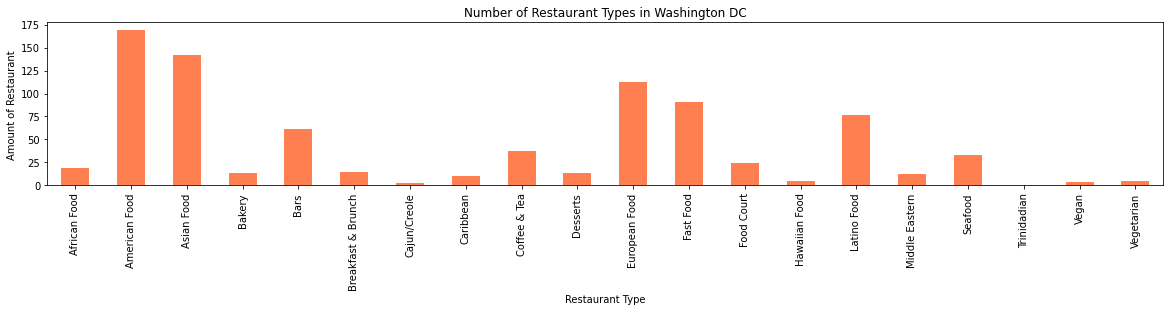

In [26]:
#Plot of # restaurant type in DC
DC_num = DC_typerest.plot(kind="bar", color='coral', title = "Number of Restaurant Types in Washington DC", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Amount of Restaurant")

plt.show()



In [27]:
Analysis1 = DC_Clean[["category", "rating"]].groupby("category").mean()


In [28]:
Analysis1.describe()

,rating
count,20.000000
mean,4.078740
std,0.275229
min,3.500000
25%,3.948005
50%,4.067254
75%,4.220395
max,4.600000


In [29]:
Analysis2 = DC[["category", "rating"]].groupby("category").mean()
Analysis2

,rating
category,
Acai Bowls,5.000000
Afghan,4.500000
African,3.833333
American (New),3.985294
American (Traditional),3.846154
...,...
Venezuelan,4.000000
Venues & Event Spaces,3.500000
Vietnamese,4.115385


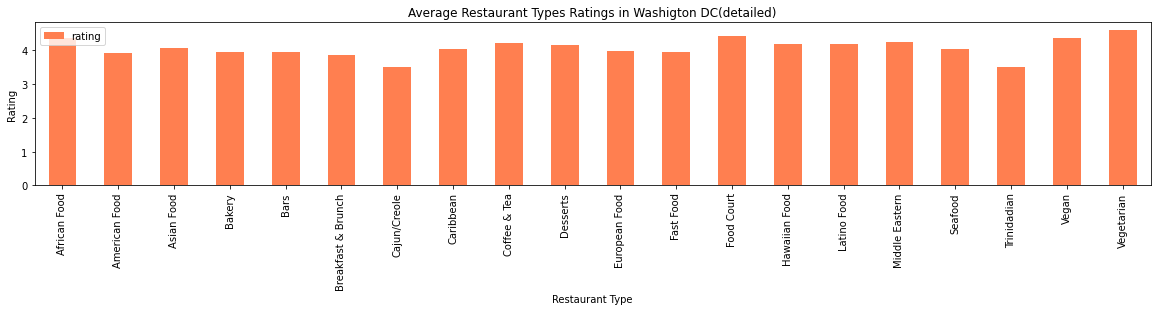

In [30]:
#Broad Graph 
DC_grouped = Analysis1.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Washigton DC(detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()



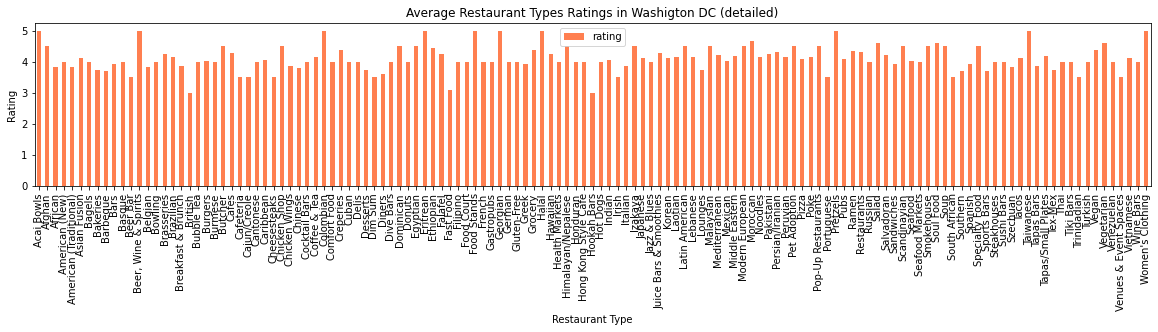

In [31]:
#Plot of all the category type (unsorted) in DC 
DC_Detailed = Analysis2.plot(kind="bar", color='coral', title = "Average Restaurant Types Ratings in Washigton DC (detailed)", figsize=(20,3))
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

plt.show()



In [32]:
#Foodtruck frames combined
frames = [Foodtruck,Foodtrucka, Foodtruckb, Foodtruck2, Foodtruck2a, Foodtruck2b, Foodtruck3, Foodtruck3a, Foodtruck3b, Foodtruck4, Foodtruck4a, Foodtruck4b]
FoodtruckDC = pd.concat(frames)
FoodtruckDC['Duplicate'] = FoodtruckDC.duplicated()
FoodtruckDC = FoodtruckDC.loc[FoodtruckDC['State'] == "DC" ]
FoodtruckDC

,name,category,latitude,longitude,rating,address,State,Zipcode,Duplicate
239,B Doughnut Pop-up,Donuts,38.908218,-77.063057,4.5,,DC,20007,False
294,Kabob_King,Halal,38.915741,-77.046263,5.0,,DC,20009,False
328,Pars Kabob,Food Trucks,38.907231,-77.036464,4.0,,DC,,False
370,PhoWheels,Vietnamese,38.908280,-77.062910,4.5,,DC,20007,False
397,Campfire,Cheesesteaks,38.895000,-77.036667,4.0,,DC,,False
...,...,...,...,...,...,...,...,...,...
788,El Sol Food Truck,Food Trucks,38.905910,-77.021060,5.0,,DC,20001,True
837,CaliBurger,Food Trucks,38.904006,-77.005605,3.5,1101 First St NE,DC,20002,True
932,Aloha Hungry Heart,Food Trucks,38.904550,-77.031060,4.5,,DC,20005,True
942,Fajitas Factory,Food Trucks,38.895149,-77.026489,4.5,,DC,20004,True


In [33]:
#Get rid of duplicate
FoodtruckDC = FoodtruckDC.loc[FoodtruckDC['Duplicate'] == False ]

FoodtruckDC

,name,category,latitude,longitude,rating,address,State,Zipcode,Duplicate
239,B Doughnut Pop-up,Donuts,38.908218,-77.063057,4.5,,DC,20007,False
294,Kabob_King,Halal,38.915741,-77.046263,5.0,,DC,20009,False
328,Pars Kabob,Food Trucks,38.907231,-77.036464,4.0,,DC,,False
370,PhoWheels,Vietnamese,38.908280,-77.062910,4.5,,DC,20007,False
397,Campfire,Cheesesteaks,38.895000,-77.036667,4.0,,DC,,False
403,Tempo Di Pasta,Food Trucks,38.958973,-77.078362,4.5,,DC,20015,False
491,Roaming Rooster,Food Trucks,38.907959,-77.018860,4.5,,DC,20098,False
535,Chris' Marketplace,Seafood,38.910709,-77.044820,4.5,,DC,20009,False
641,Just Steak & Cheese,Food Trucks,NaN,NaN,4.0,,DC,,False
697,Moh Moh Dumpling,Asian Fusion,38.905910,-77.021057,4.5,,DC,20001,False


In [34]:
#Mean Rating of Foodtrucks in Washigton DC
FoodtruckDC['rating'].mean()

4.344444444444444

In [35]:
#Merge all the remaining data
frames = [TBH, TBH2, TBH3, TBH4]
TBHDC = pd.concat(frames)

In [36]:
#Get  rid of duplicates 
TBHDC = TBHDC.loc[TBHDC['initial'] != "SW"]
TBHDC = TBHDC.loc[TBHDC['initial'] != "NW"]
TBHDC = TBHDC.loc[TBHDC['initial'] != "NE"]
TBHDC = TBHDC.loc[TBHDC['initial'] != "SE"]

TBHDC['Duplicate'] = TBHDC.duplicated()
TBHDC

TBHDC = TBHDC.loc[TBHDC['Duplicate'] == False ]


#Only 5 restaurants had to be added to our DC dataframe. 

